<a href="https://colab.research.google.com/github/ImeCMR/Maze-Robot/blob/main/Maze_Robot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [ ]:
import numpy as np                                                               #import libraries
import pylab as plt

Map cell to cell, add circular cell to goal point


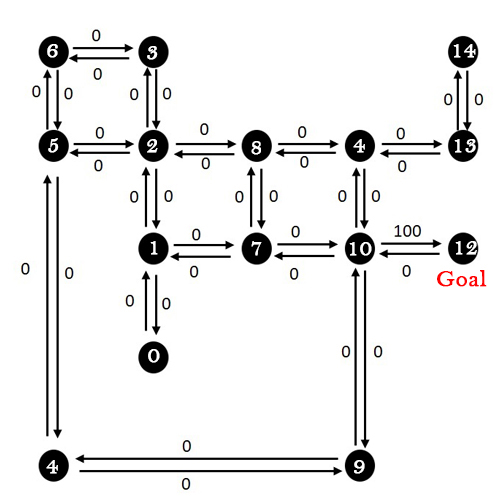

Points list

In [ ]:
points_list = (4,9),(1,7),(7,10),(10,12),(5,2),(2,8),(8,4),(4,13),(6,5),(5,4),(1,0),(1,2),(7,8),(4,10),(6,5),(3,2),(13,14)               #defining connections

Setting the goal and starting points and plot the graph

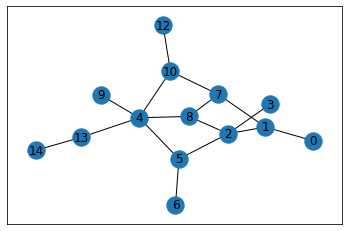

In [ ]:
goal = 4

import networkx as nx
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()


R matrix

In [ ]:
R = np.matrix([[0.,-1.,-1.,-1.],                                                #create R matrix
      [0., 0., -1., 0.],                                                        #Actions--------> 0 - up | 1 - down | 2 - left | 3 - right
      [0., 0., 0., 0.],
      [-1., 0., 0., -1.],
      [0., -1., -1., 0.],
      [0., 0., -1., 0.],
      [-1.,0.,-1.,0.],
      [0.,-1.,0.,0.],
      [-1.,0.,0.,0.],
      [0.,-1.,0.,-1.],
      [0.,0.,0.,100.],
      [-1.,0.,0.,0.],
      [-1.,-1.,0.,-1.],
      [0.,-1.,0.,-1.],
      [-1.,0.,-1.,-1.]])

S matrix (State matrix)

In [ ]:
S = np.matrix([[1.,-1.,-1.,-1.],                                                #create state matrix
      [2., 0., -1., 7.],                                                        #Actions--------> 0 - up | 1 - down | 2 - left | 3 - right
      [3., 1., 5., 8.],
      [-1., 2., 6., -1.],
      [5., -1., -1., 9.],
      [6., 4., -1., 2.],
      [-1., 5., -1., 3.],
      [8.,-1.,1.,10.],
      [-1.,7.,2.,11.],
      [10.,-1.,4.,-1.],
      [11.,9.,7.,12.],
      [-1.,10.,8.,13.],
      [-1.,-1.,10.,-1.],
      [14.,-1.,11.,-1.],
      [-1.,13.,11.,-1.]])

Building the Q table

In [ ]:
Q = np.matrix(np.zeros([15,4]))                                                 #create a 15*4 Q matrix


In [ ]:


gamma = 0.8                                                                     #define learning parameter

initial_state = 14

def available_actions(state):                                                   #taking a state
    current_state_row = R[state,]                                               #taking all values of the state of the R matrix (raw)
    av_act = np.where(current_state_row >= 0)[1]                                #taking all actions in the raw which is >= 0 ------> movement
    return av_act                                                               #[1] is used to prevernt getting array[0,0]

available_act = available_actions(initial_state)                                #assign available actions to avalable_act

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))                        #taking a one number randomly from available actions as the next action
    return next_action

action = sample_next_action(available_act)                                      #assign the taken number as the nest action#0



def update(current_state, action, gamma):                                       #update the values

  next_state = int(S[current_state,action])

  max_index = np.where(Q[next_state,:] == np.max(Q[next_state,:]))[1]           #taking then maximum values from the raw of actions from Q table
  if max_index.shape[0] > 1:                                                    #runs when there are more than one maximum numbers in max_index
    max_index = int(np.random.choice(max_index, size = 1))                      #select a value as a integer from max_index randomly
  else:                                                                         #runs when there is no more than one maximum numbers
    max_index = int(max_index)                                                  #making the maximum number an interger and assign it inti max_index again
  max_value = S[next_state, max_index]                                          #define the maximum value from the S table into max_value

  Q[current_state,action] = R[current_state, action] + gamma * max_value        #taking values to fill the Q table
  print('max_value', R[current_state, action] + gamma * max_value)

  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)

update(initial_state, action, gamma)


max_value -0.8


0

Training

In [ ]:
scores = []
for i in range(700):                                                            #runtimes
  current_state = np.random.randint(0, int(Q.shape[0]))                         #taking a number randomly from Q matrix
  available_act = available_actions(current_state)                              #call available_actions funtion defined in the above code and assign values into available_act
  action = sample_next_action(available_act)                                    #taking an action by calling sample_next_action defined in above code and assign it into action

  score = update(current_state,action,gamma)                                    #updating the Q matrix
  scores.append(score)
  print('Score:', str(score))

print("Trained Q matrix:")
print(Q/np.max(Q)*100)

max_value -0.8
Score: 0
max_value 8.0
Score: 80.0
max_value 10.4
Score: 161.53846153846155
max_value 5.6000000000000005
Score: 215.38461538461542
max_value 6.4
Score: 276.92307692307696
max_value -0.8
Score: 269.2307692307692
max_value 4.0
Score: 307.69230769230774
max_value 1.6
Score: 323.0769230769231
max_value 10.4
Score: 361.5384615384616
max_value 1.6
Score: 376.92307692307696
max_value -0.8
Score: 292.3076923076923
max_value -0.8
Score: 292.3076923076923
max_value 108.0
Score: 128.14814814814815
max_value 5.6000000000000005
Score: 133.33333333333334
max_value 1.6
Score: 133.33333333333334
max_value -0.8
Score: 132.5925925925926
max_value 99.2
Score: 135.48387096774192
max_value 4.0
Score: 135.48387096774192
max_value 0.8
Score: 136.29032258064515
max_value 8.8
Score: 143.54838709677418
max_value -0.8
Score: 142.74193548387098
max_value 6.4
Score: 149.19354838709677
max_value 6.4
Score: 155.64516129032256
max_value 9.600000000000001
Score: 165.32258064516128
max_value 0.8
Score: 1

Testing

Most efficient path:
[0, 1, 7, 10, 12]
[array([0]), array([3]), array([3]), array([3])]


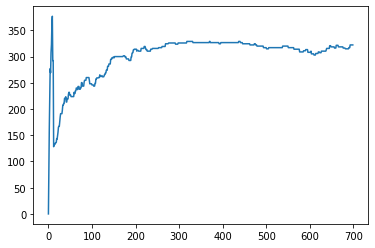

In [ ]:
current_state = 0                                                               #starting point
steps = [current_state]                                                         #defines steps variable and equal it into currrent_state
used_actions = []

while current_state != 12:                                                      #runs while current state is not equal to goal

  next_action = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]     #taking the maximum value from the sections in the current state's raw and assign
  next_step_index = S[current_state,next_action]                                #it into nest_step_index

  if next_step_index.shape[0] > 1 :                                             #check whether there are more than one maximum numbers
    next_step_index = int(np.random.choice(next_step_index, size = 1))          #taking a random value from the values in next_step_index

  else:
    next_step_index = int(next_step_index)

  steps.append(next_step_index)                                                 #adding next_step_index into steps variable
  used_actions.append(next_action)                                              #adding next_action into used_actions variable
  current_state = next_step_index                                               #assign next_step_index as the current_state

print("Most efficient path:")
print(steps)                                                                    #prints the shortest path
print(used_actions)

plt.plot(scores)
plt.show()

# Run given episodes

Episode 01

In [ ]:
Q = np.matrix(np.zeros([15,4]))

state = 0                                                                       #starting point
actions_list = [0,3,3,3]                                                        #list of actions follwed
i = -1
while i != (len(actions_list)-1):
  action = actions_list[i+1]
  update(state,action,gamma)
  state = int(S[state,action])
                                                                                #action = path1[i+1]
  i = i + 1
print("Q matrix after Episode 01")
print(Q)

max_value 0.0
max_value 0.8
max_value 7.2
max_value 99.2
Q matrix after Episode 01
[[ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0.8]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   7.2]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.  99.2]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]]


Episode 02

In [ ]:
Q = np.matrix(np.zeros([15,4]))

state = 2                                                                       #starting point
actions_list = [1,3,0,3,1,3]                                                    #list of actions follwed
i = -1
while i != (len(actions_list)-1):
  action = actions_list[i+1]
  update(state,action,gamma)
  state = int(S[state,action])
                                                                                #action = path1[i+1]
  i = i + 1
print("Q matrix after Episode 02")
print(Q)

max_value 0.0
max_value 8.0
max_value 8.8
max_value 8.0
max_value 8.8
max_value 99.2
Q matrix after Episode 02
[[ 0.   0.   0.   0. ]
 [ 0.   0.   0.   8. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 8.8  0.   0.   0. ]
 [ 0.   0.   0.   8. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.  99.2]
 [ 0.   8.8  0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]]


Episode 03

In [ ]:
Q = np.matrix(np.zeros([15,4]))

state = 8                                                                       #starting point
actions_list = [1,3,3]                                                          #list of actions follwed
i = -1
while i != (len(actions_list)-1):
  action = actions_list[i+1]
  update(state,action,gamma)
  state = int(S[state,action])
                                                                                #action = path1[i+1]
  i = i + 1
print("Q matrix after Episode 03")
print(Q)

max_value 0.8
max_value 5.6000000000000005
max_value 99.2
Q matrix after Episode 03
[[ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   5.6]
 [ 0.   0.8  0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.  99.2]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]
 [ 0.   0.   0.   0. ]]
